# Assignment 2 - Grocery store - Delphine

A grocery sales company is looking for patterns in its sales data regarding regions, sales reps, and product categories. Conduct an analysis to surface any notable patterns, particularly related to sales results.



## Import and explore all dataframes

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
cities = pd.read_csv('cities.csv', encoding="ISO-8859-1")
customers = pd.read_csv('customers.csv', encoding="ISO-8859-1")
item_master = pd.read_csv('item_master.csv', encoding="ISO-8859-1")
sales = pd.read_csv('sales.csv', encoding="ISO-8859-1")
sales_rep = pd.read_csv('sales_rep.csv', encoding="ISO-8859-1")

In [4]:
print(cities.shape)
cities.head(1)

(100, 6)


,City,City Code,Region,Latitude,Longitude,Desc
0,New York,1,USA,40.730599,-73.986581,"""New York City, NY, US"""


In [5]:
print(customers.shape)
customers.head()

(684, 3)


,Customer,Customer Number,City Code
0,A Superior System,10000453,1
1,A&B,10000456,76
2,A&G,10000457,2
3,A&R Partners,10000458,43
4,A1 Datacom Supply,10000461,77


In [6]:
print(item_master.shape)
item_master.head()

(827, 5)


,Item Number,Product Group,Product Line,Product Sub Group,Product Type
0,10001,Beverages,Drink,Juice,Pure Juice Beverages
1,10002,Beverages,Drink,Flavored Drinks,Drinks
2,10003,Beverages,Drink,Flavored Drinks,Drinks
3,10004,Beverages,Drink,Soda,Carbonated Beverages
4,10005,Beverages,Drink,Soda,Carbonated Beverages


In [7]:
print(sales.shape)
sales.head()

(96466, 15)


,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number
0,3428,-513.15,10012226,1/12/2012,-573.3835,1/12/2012,318960,Cutting Edge Sliced Ham,10696,-37.29,115785,1/12/2012,-550.44,-1.0,180
1,3429,-105.93,10012226,1/12/2012,-204.6638,1/12/2012,318960,Washington Cranberry Juice,10009,-90.54,115785,1/12/2012,-196.47,-2.0,180
2,3430,-88.07,10012226,1/12/2012,-165.8016,1/12/2012,318960,Moms Sliced Ham,10385,-71.10,115785,1/12/2012,-159.17,-3.0,180
3,3431,-43.12,10012226,1/12/2012,-118.3703,1/12/2012,318960,Tip Top Lox,10215,-70.52,115785,1/12/2012,-113.64,-1.0,180
4,3432,-37.98,10012226,1/12/2012,-102.3319,1/12/2012,318960,Just Right Beef Soup,10965,-60.26,115785,1/12/2012,-98.24,-1.0,180


In [8]:
print(sales_rep.shape)
sales_rep.head(15)

(64, 8)


,Manager,Manager Number,Path,Sales Rep Name,Sales Rep Name1,Sales Rep Name2,Sales Rep Name3,Sales Rep ID
0,Amanda Honda,104,Amanda Honda-Amalia Craig,Amalia Craig,Amanda Honda,Amalia Craig,NaN,103
1,Amanda Honda,104,Amanda Honda-Cart Lynch,Cart Lynch,Amanda Honda,Cart Lynch,NaN,112
2,Amanda Honda,104,Amanda Honda-Molly McKenzie,Molly McKenzie,Amanda Honda,Molly McKenzie,NaN,159
3,Amanda Honda,104,Amanda Honda-Sheila Hein,Sheila Hein,Amanda Honda,Sheila Hein,NaN,176
4,Brenda Gibson,109,Brenda Gibson-Dennis Johnson,Dennis Johnson,Brenda Gibson,Dennis Johnson,NaN,121
5,Brenda Gibson,109,Brenda Gibson-Ken Roberts,Ken Roberts,Brenda Gibson,Ken Roberts,NaN,145
6,Brenda Gibson,109,Brenda Gibson-Robert Kim,Robert Kim,Brenda Gibson,Robert Kim,NaN,163
7,Brenda Gibson,109,Brenda Gibson-William Fisher,William Fisher,Brenda Gibson,William Fisher,NaN,185
8,Carolyn Halmon,111,Stewart Wind-Carolyn Halmon-Cary Frank,Cary Frank,Stewart Wind,Carolyn Halmon,Cary Frank,113
9,Carolyn Halmon,111,Stewart Wind-Carolyn Halmon-Edward Smith,Edward Smith,Stewart Wind,Carolyn Halmon,Edward Smith,152


# Wrangle / prepare

In [10]:
# Are there any nans in some of the dataframes?
print("Cities\n", cities.isnull().sum())
print('\nCustomers\n', customers.isnull().sum())
print('\nItem_master\n', item_master.isnull().sum())
print('\nSales\n', sales.isnull().sum())
print('\nSales_rep\n', sales_rep.isnull().sum())

Cities
 City         0
City Code    0
Region       0
Latitude     0
Longitude    0
Desc         1
dtype: int64

Customers
 Customer           0
Customer Number    0
City Code          0
dtype: int64

Item_master
 Item Number          0
Product Group        0
Product Line         0
Product Sub Group    0
Product Type         0
dtype: int64

Sales
 %KEY                      0
Cost                      0
Customer Number           0
Date                      0
GrossSales                0
Invoice Date              0
Invoice Number            0
Item Desc                 0
Item Number               0
Margin                    0
Order Number              0
Promised Delivery Date    0
Sales                     0
Sales Qty                 0
Sales Rep Number          0
dtype: int64

Sales_rep
 Manager             0
Manager Number      0
Path                0
Sales Rep Name      0
Sales Rep Name1     0
Sales Rep Name2     5
Sales Rep Name3    25
Sales Rep ID        0
dtype: int64


Only the sales_rep and cities dataframe has null values. 

for the cities dataframe, there is one value missing in the Desc column. since it is just one value, we will find it and replace.

Not too sure what to do with the sales_rep dataframe at the moment, I don't think it is mandatory to get rid of them since we can get all the sales reps linked to a Rep ID on the path column in the sales_rep dataframe

In [11]:
# Find the nan in the region csv
# list of indexes where the column "desc" is a nan, the list will have only one entry as discovered previously
index = list(np.where(cities['Desc'].isnull())[0])[0]

# Find the description and replace the value in the dataframe. 
# We want the longitude and latitude of the city to Google and find the description
print('latitude', cities['Latitude'][index])
print('longitude', cities['Longitude'][index])
print('City name', cities['City'][index])

# The city found in Google by using long lat infos is Yokohama, so the information I found is coherent to the dataframe
# We will replace the Nan value with a description
cities.loc[index, 'Desc'] = "Yokohama, Kanagawa, Japan"

# Quick print to make sure the nan value has been replaced properly
cities.isnull().sum()

latitude 35.455592
longitude 139.572196
City name Yokohama


City         0
City Code    0
Region       0
Latitude     0
Longitude    0
Desc         0
dtype: int64

In [13]:
# Create a master dataframe with all dataframes merged together

master_df = pd.merge(customers, cities, how='inner', on='City Code')
master_df = pd.merge(master_df, sales, how='inner', on='Customer Number')
master_df = pd.merge(master_df, item_master, how='inner', on='Item Number')
master_df = pd.merge(master_df, sales_rep, how='inner', left_on='Sales Rep Number', right_on='Sales Rep ID')

In [14]:
# check the columns to make sure all are now in the master dataframe
master_df.columns

Index(['Customer', 'Customer Number', 'City Code', 'City', 'Region',
       'Latitude', 'Longitude', 'Desc', '%KEY', 'Cost', 'Date', 'GrossSales',
       'Invoice Date', 'Invoice Number', 'Item Desc', 'Item Number', 'Margin',
       'Order Number', 'Promised Delivery Date', 'Sales', 'Sales Qty',
       'Sales Rep Number', 'Product Group', 'Product Line',
       'Product Sub Group', 'Product Type', 'Manager', 'Manager Number',
       'Path', 'Sales Rep Name', 'Sales Rep Name1', 'Sales Rep Name2',
       'Sales Rep Name3', 'Sales Rep ID'],
      dtype='object')

## Question

What are the regions with the most orders? 

We would be expecting the same ratio of sales as we can see with the amount of orders placed. 

Is that the case or are there regions that are behind?


Text(0.5, 1.0, 'Quantity of orders per region')

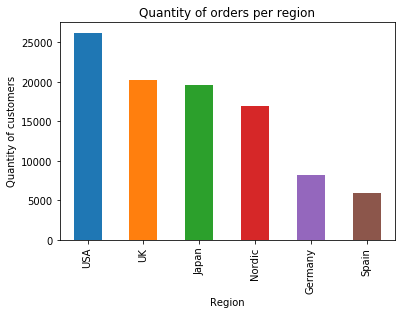

In [220]:
# Find the region with the most orders. 
# Since each line of ['customer'] is representing an order, 
#This line of code is counting the total amount of orders, rather than unique customers. 
master_df.groupby(by='Region')['Customer'].count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Quantity of customers')
plt.xlabel('Region')
plt.title('Quantity of orders per region')

Text(0.5, 1.0, 'Total sales value per region')

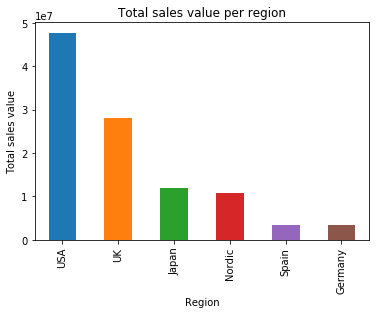

In [16]:
# What is the average sale per region?
master_df.groupby(by='Region')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Total sales value')
plt.xlabel('Region')
plt.title('Total sales value per region')

Comparing the quantity of orders per region and the total sales, assuming same volume of sales in $ per customers, we would have expected the two graphs to be roughly looking the same in terms of proportions of sales per region. It is not the case. 

Spain is also performing better than Germany, although they have less orders. What can we say about German customers and orders vs Spanish ones? 

## Customers



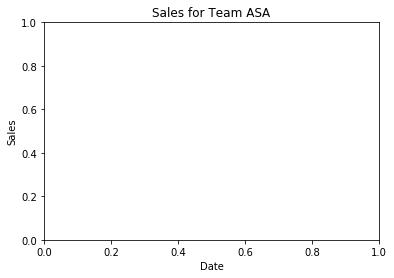

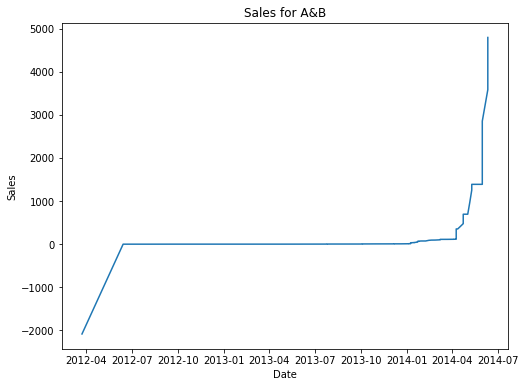

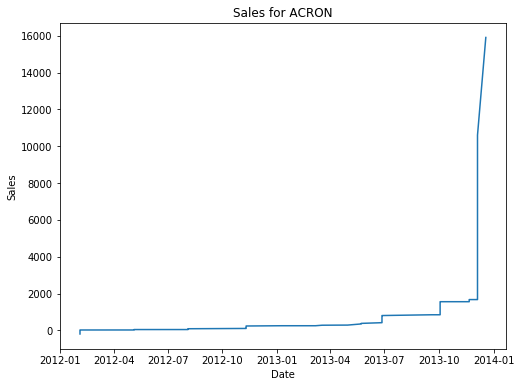

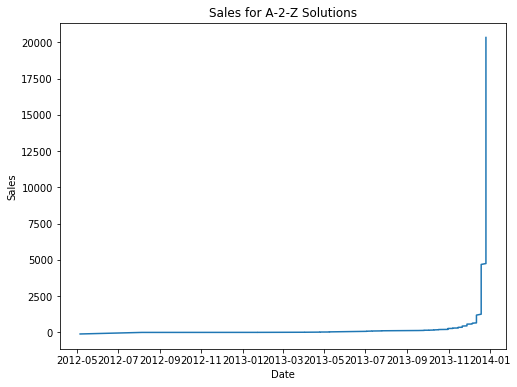

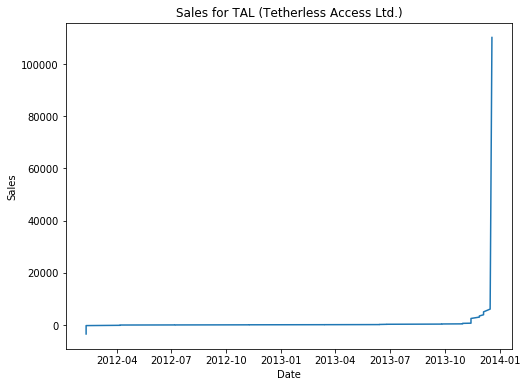

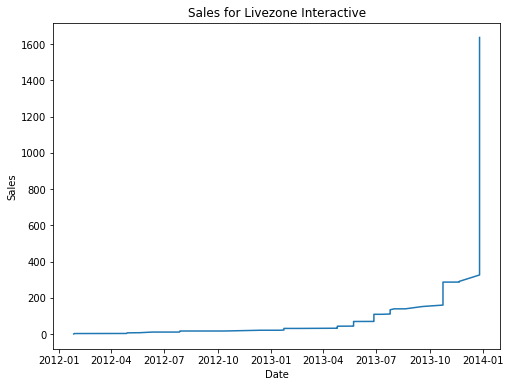

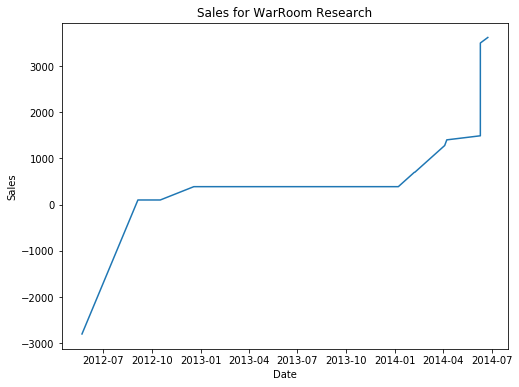

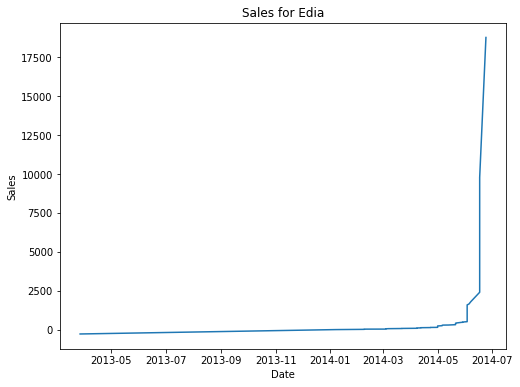

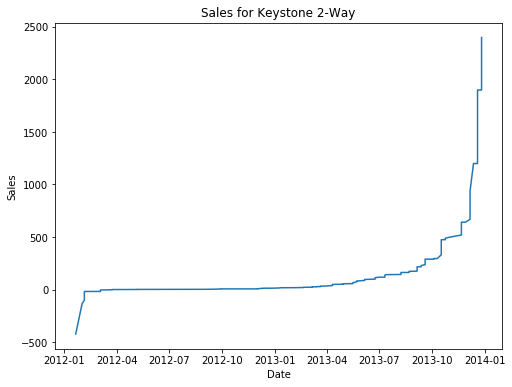

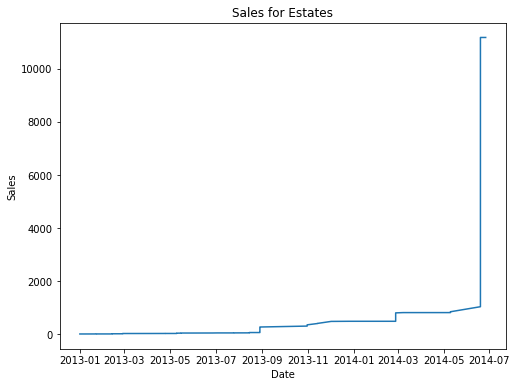

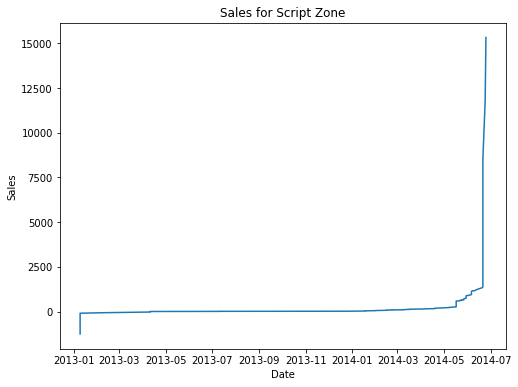

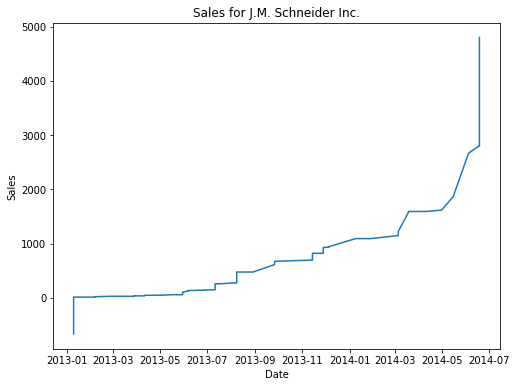

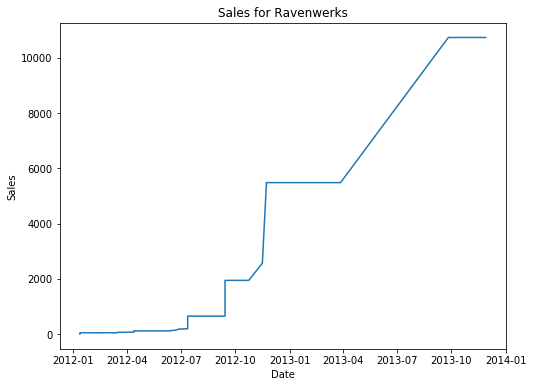

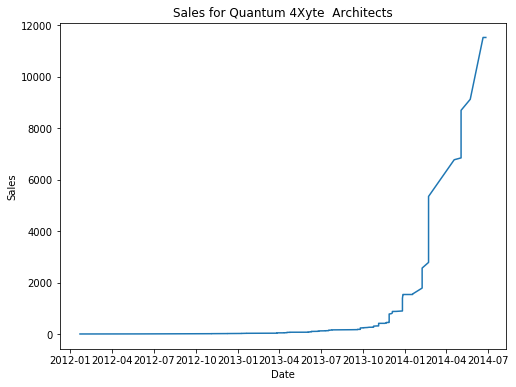

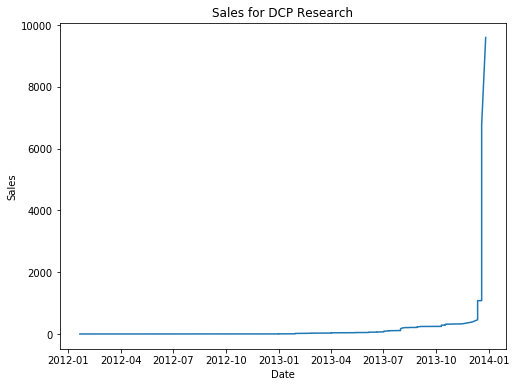

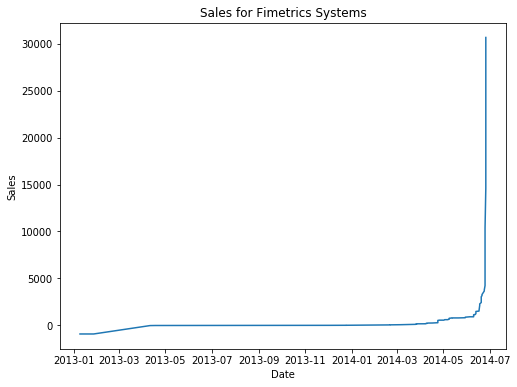

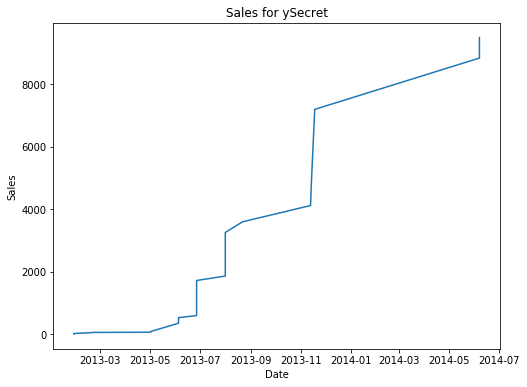

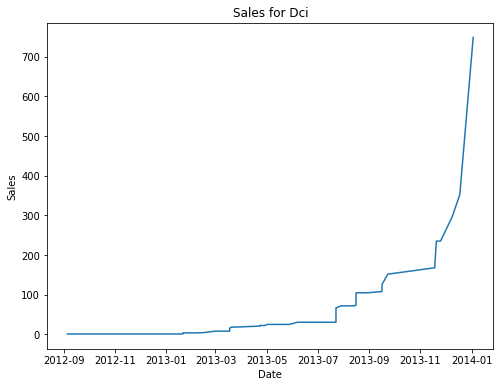

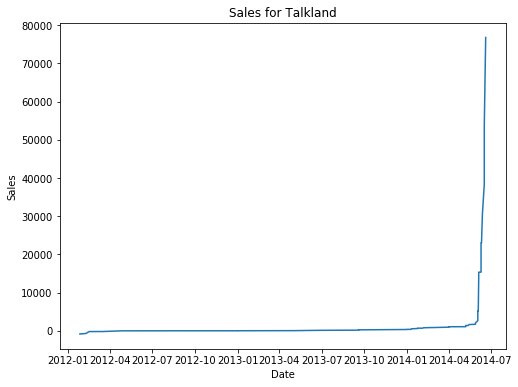

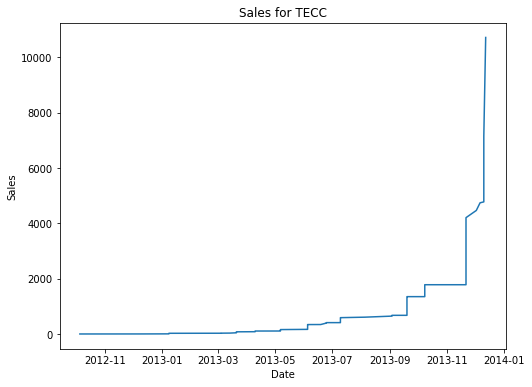

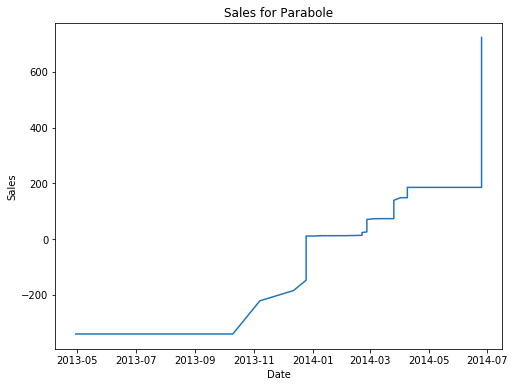

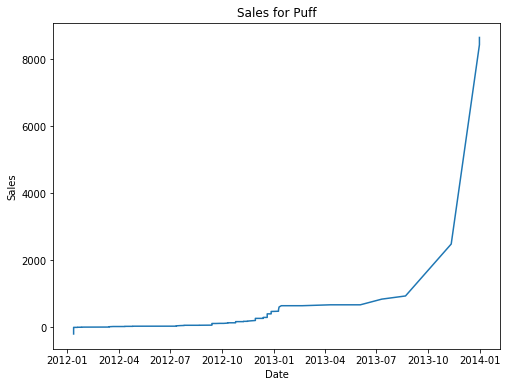

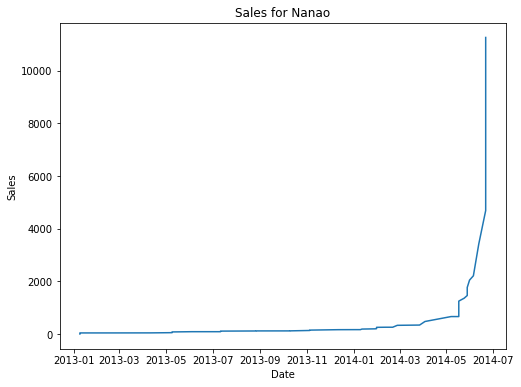

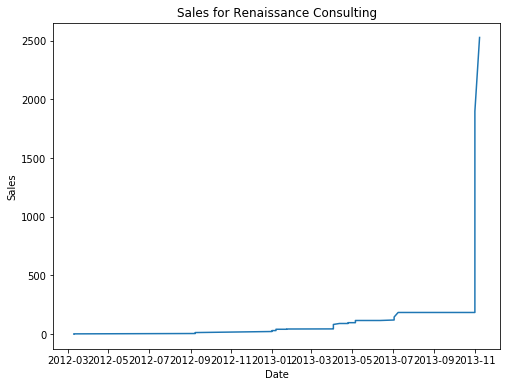

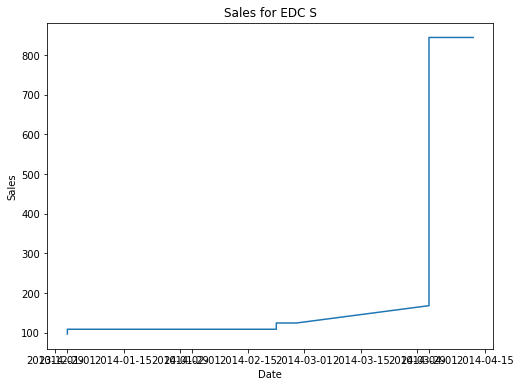

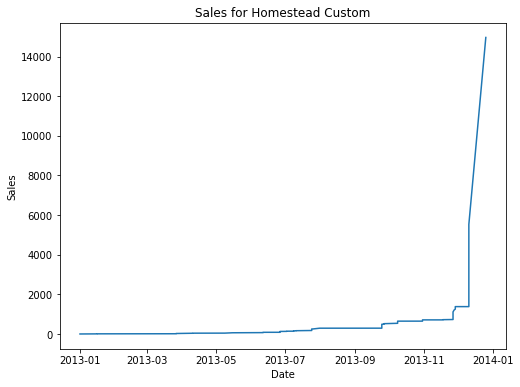

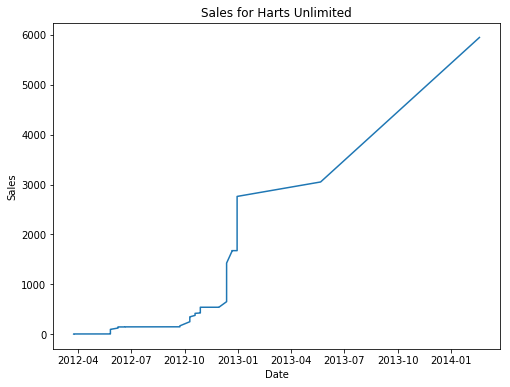

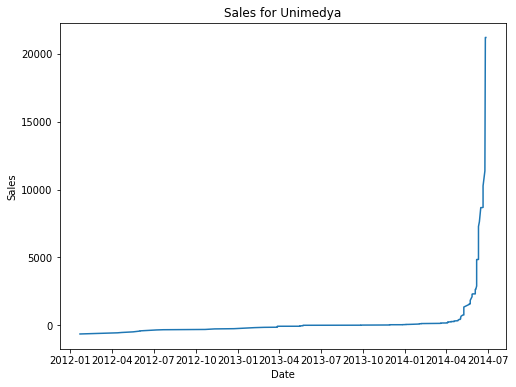

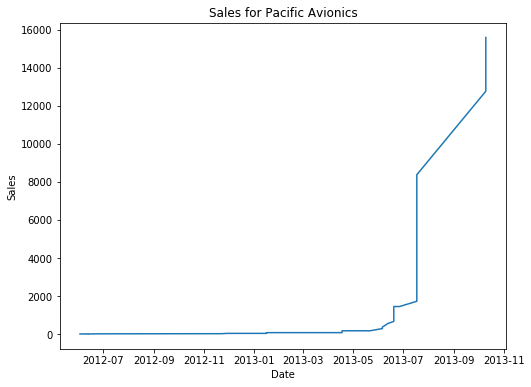

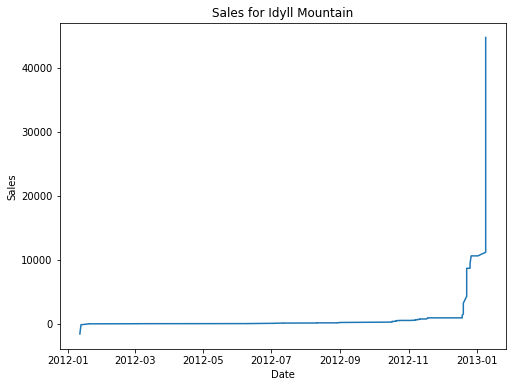

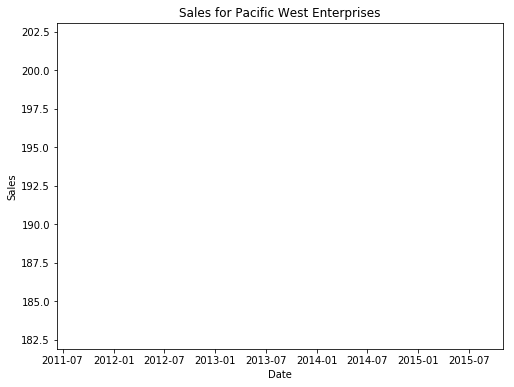

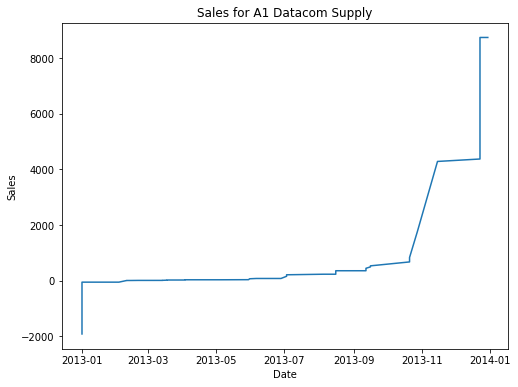

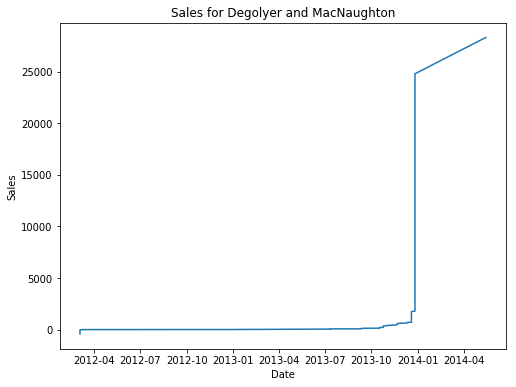

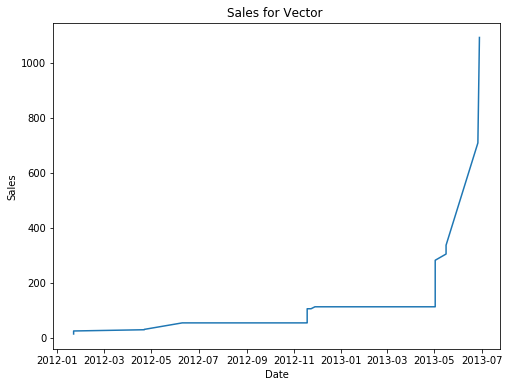

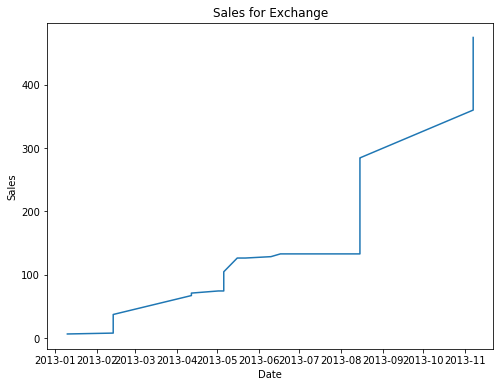

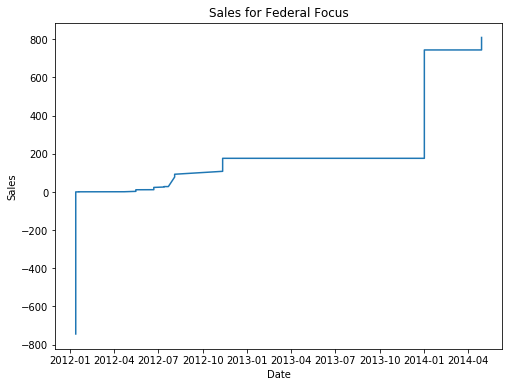

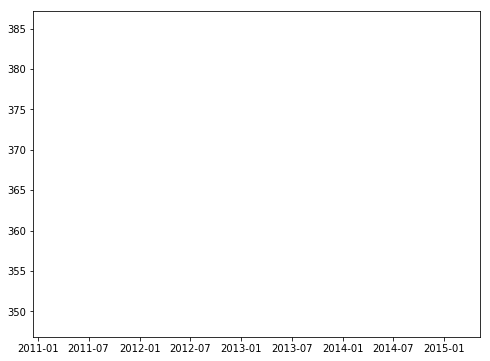

In [106]:
# SPAIN

# I wanted to plot all spanish customers' sales onto one graph to see the progression in sales. 
# I got stuck and could only plot each graph one by one, which makes it hard to see any trend.


spanishcustomers = master_df[master_df['Region']=='Spain'].reset_index()

# create a column with the date in datetime format
for i in range(0, len(spanishcustomers)):
    spanishcustomers.loc[i, 'Date_parsed'] = pd.to_datetime(spanishcustomers['Date'][i], format='%m/%d/%Y')
    
# Create a list of all spanish customers
spanish_customer_list = spanishcustomers['Customer'].unique()
    
# Print graphs of sales for each customers.. 
# Couldn't find a way to add them all into to same graph and was about to loose my hair :) 
print(' ** Evolution of sales for individual Spanish customers ** ')

for customer in spanish_customer_list:
    customer_group = spanishcustomers[spanishcustomers['Customer']==customer]
    x = customer_group['Date_parsed'].sort_values(ascending=False)
    y = customer_group['Sales'].sort_values(ascending=False)
    plt.ylabel('Sales')
    plt.xlabel('Date')
    plt.title(f'Sales for {customer}')
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y)

 ** Evolution of sales for individual German customers ** 


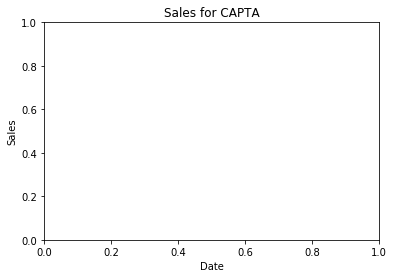

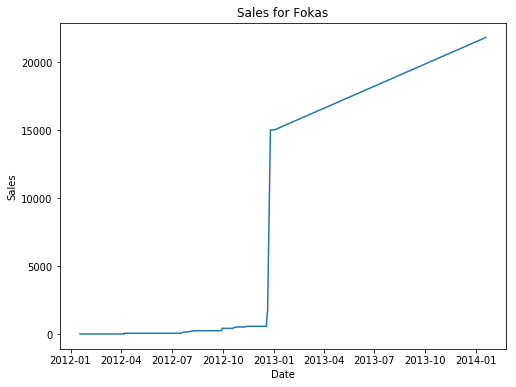

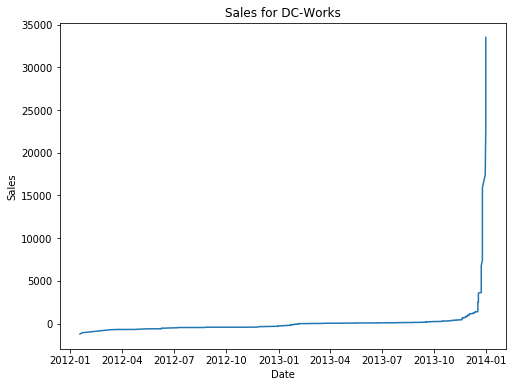

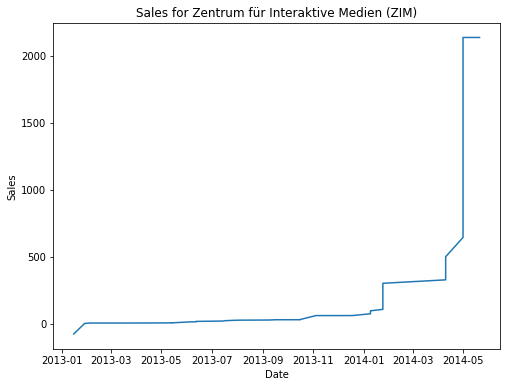

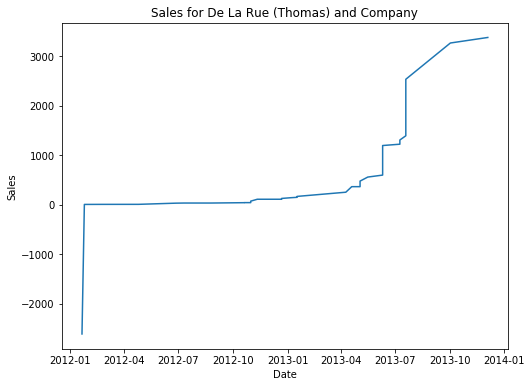

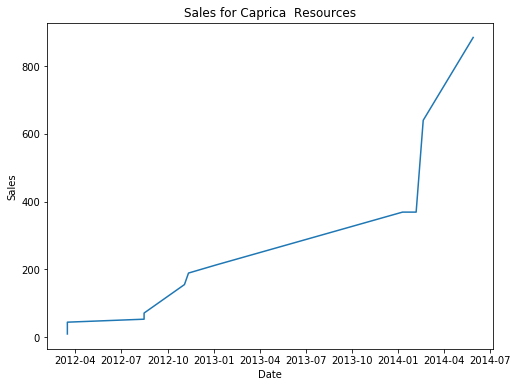

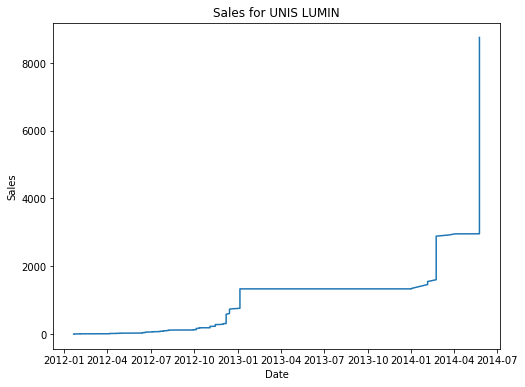

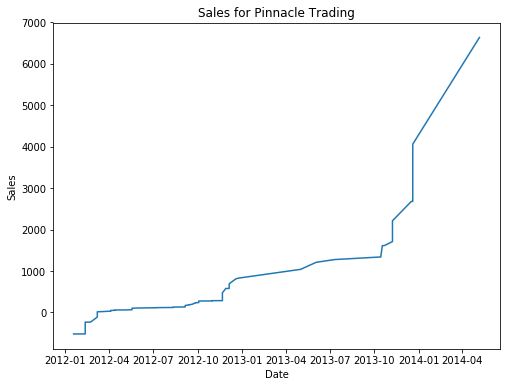

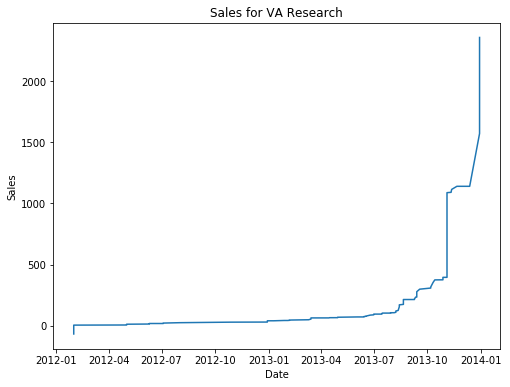

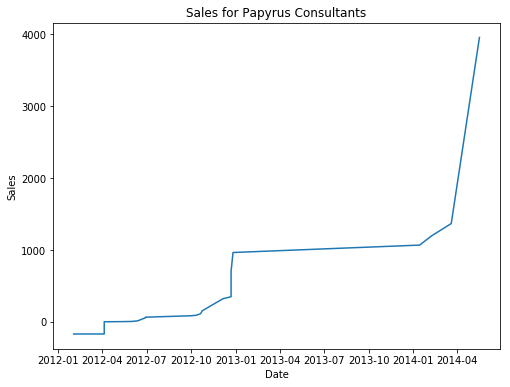

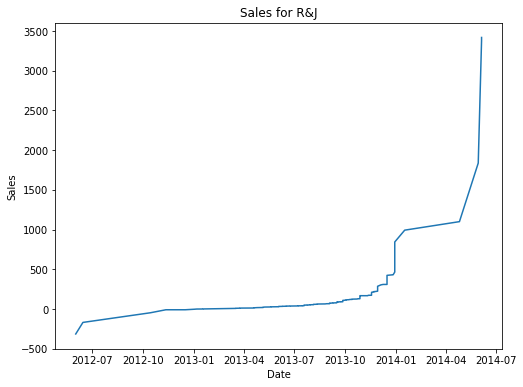

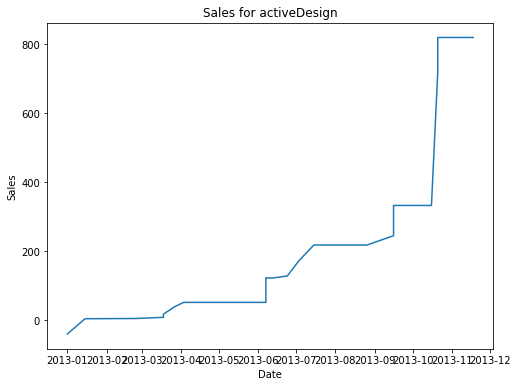

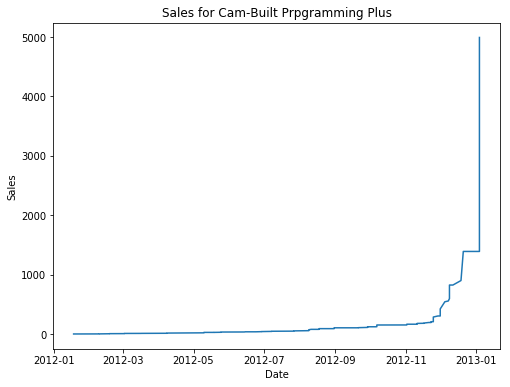

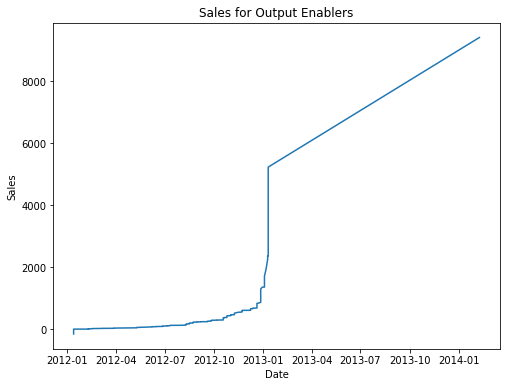

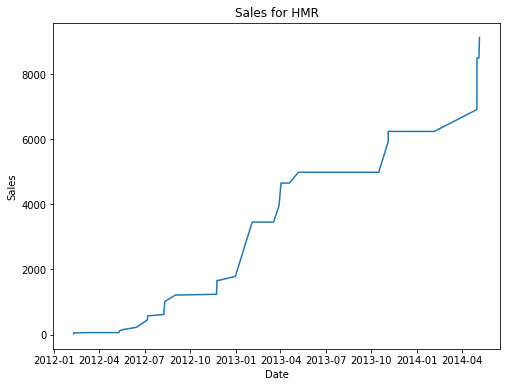

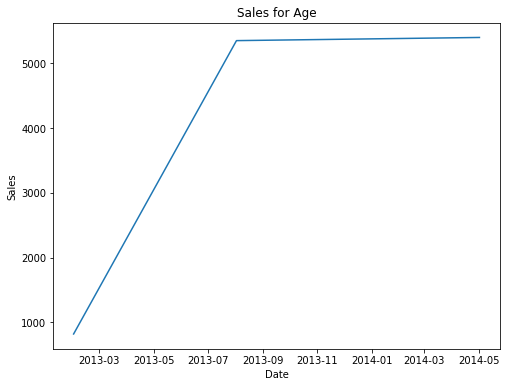

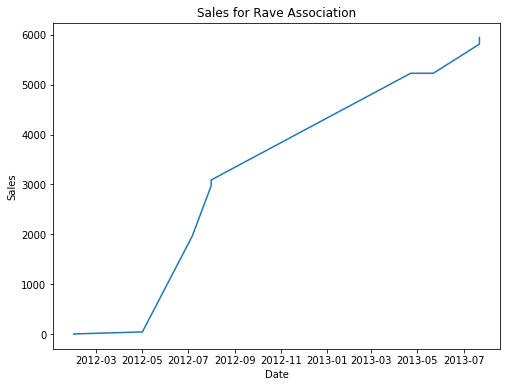

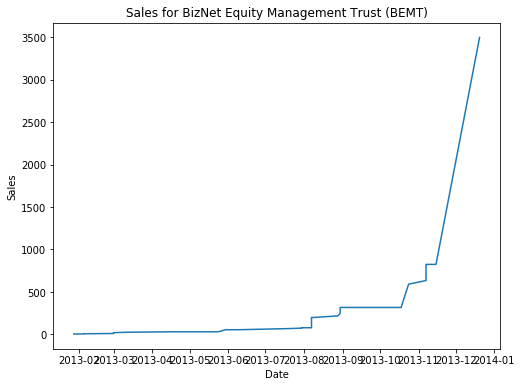

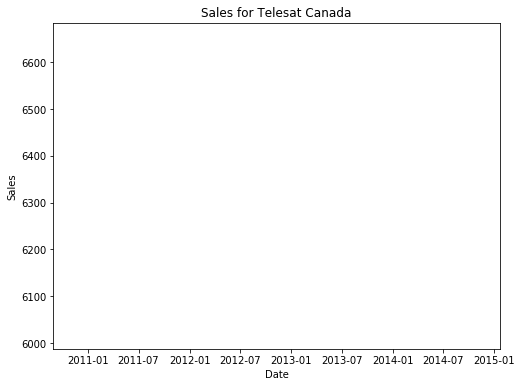

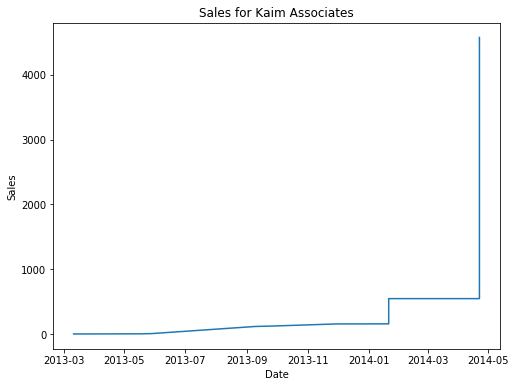

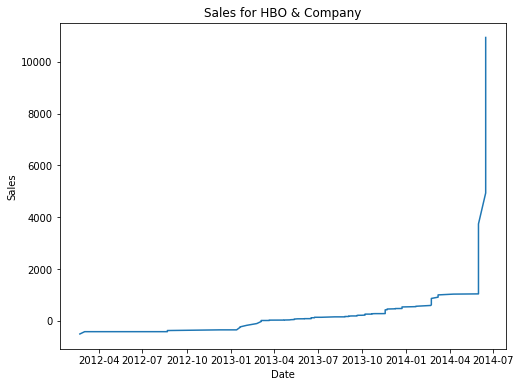

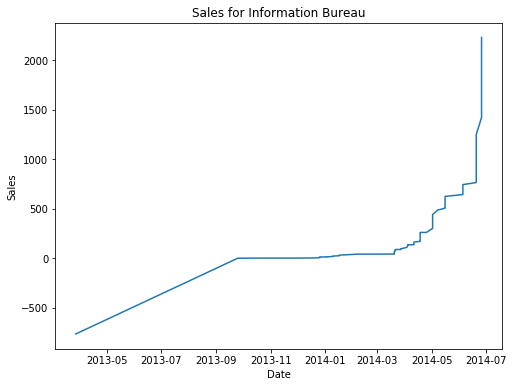

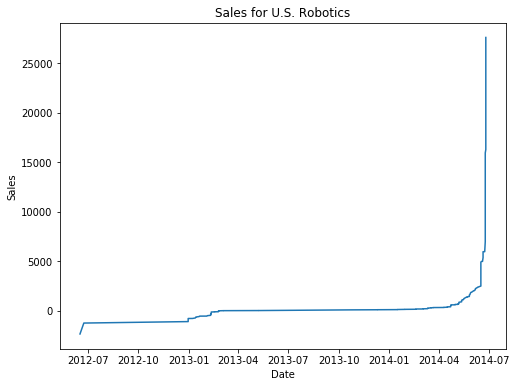

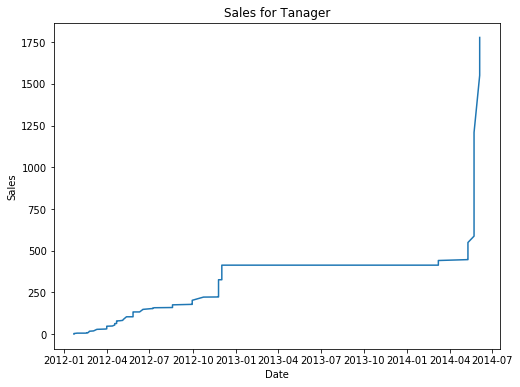

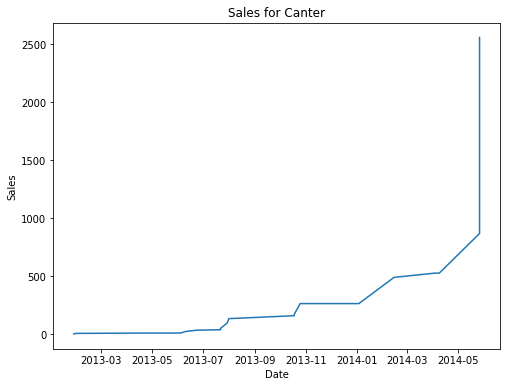

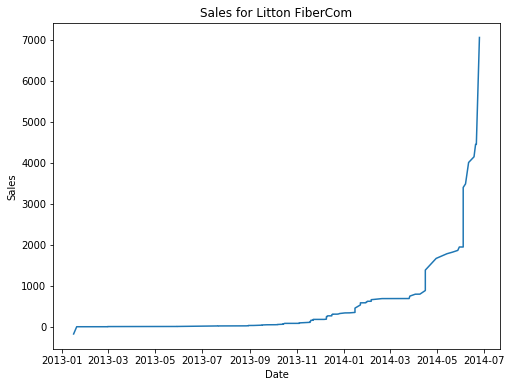

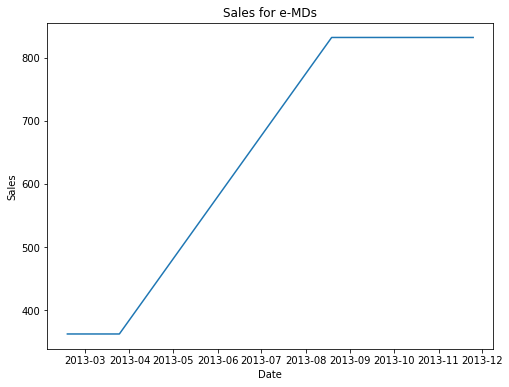

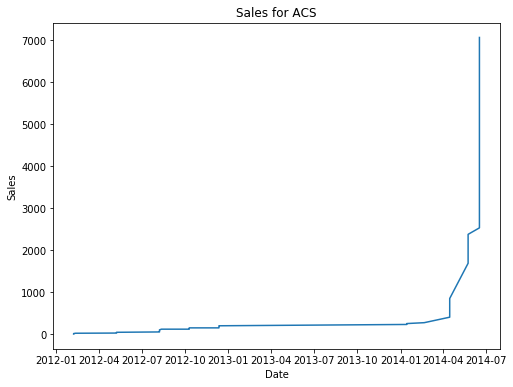

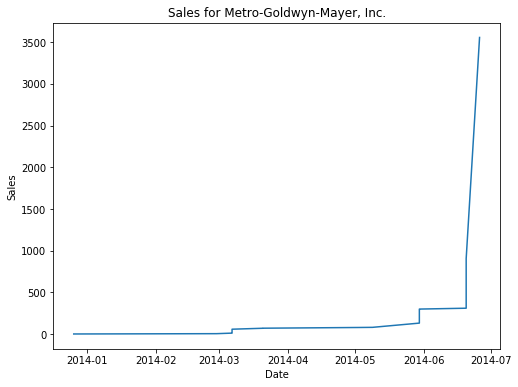

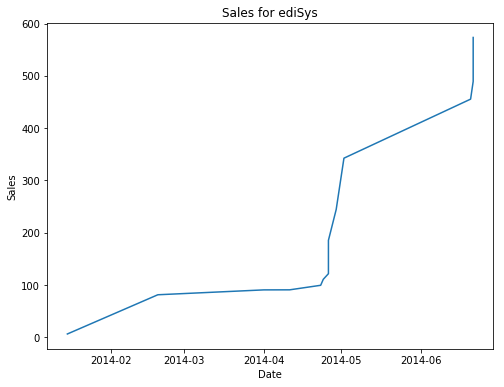

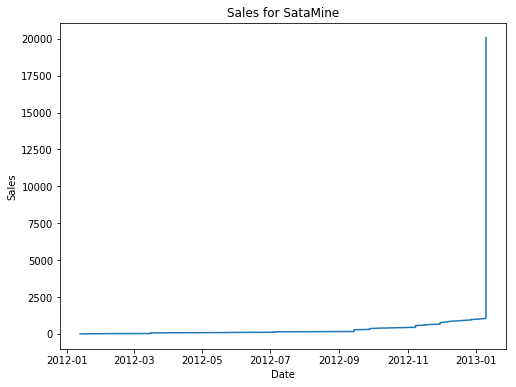

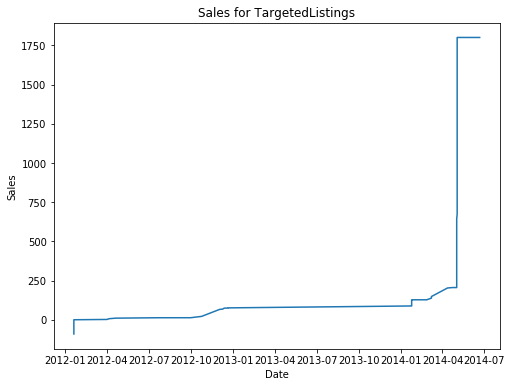

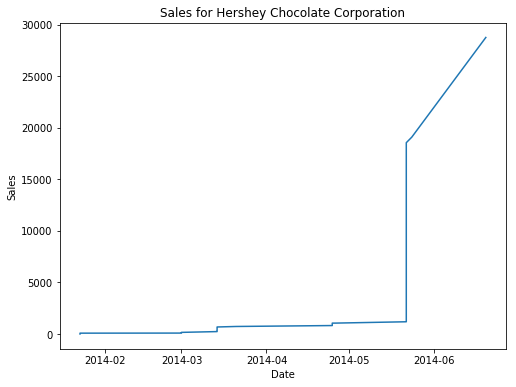

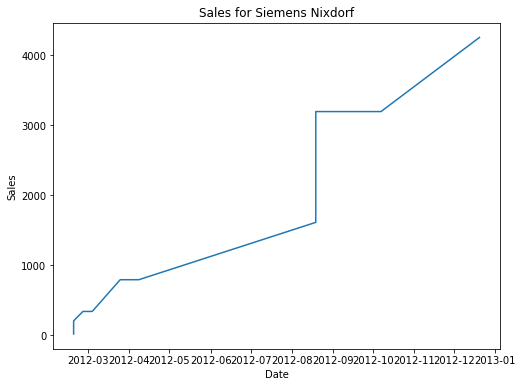

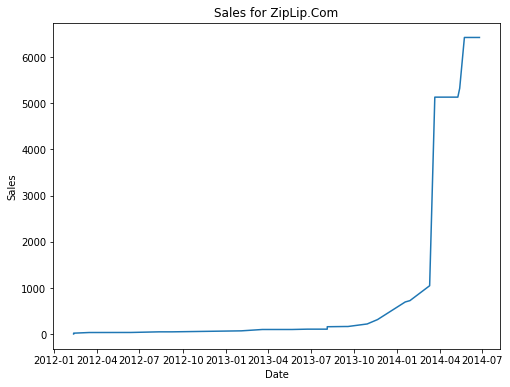

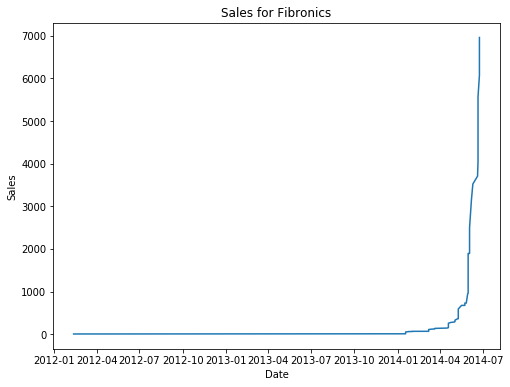

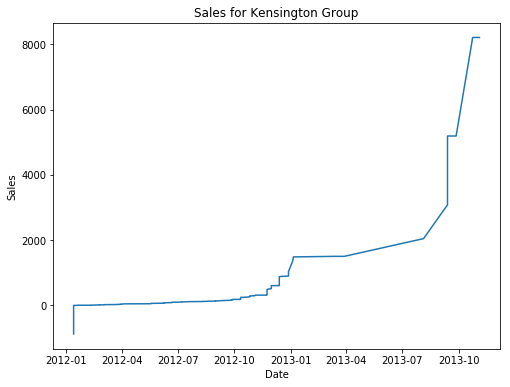

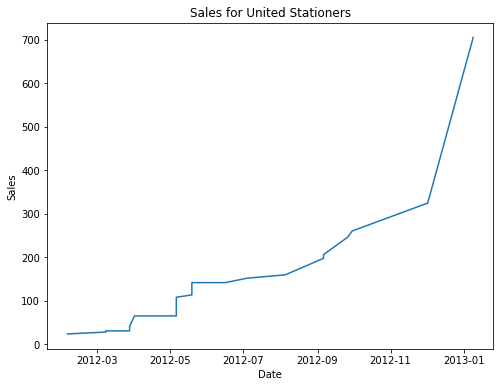

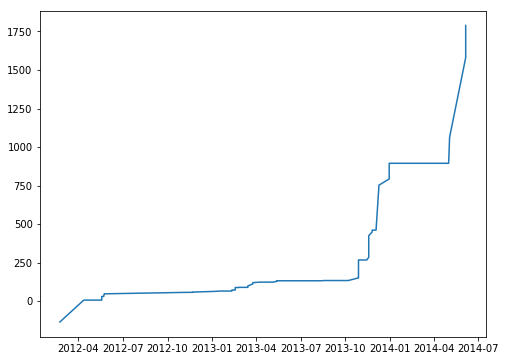

In [115]:
# GERMANY

# Same process as below

germancustomers = master_df[master_df['Region']=='Germany'].reset_index()

# create a column with the date in datetime format
for i in range(0, len(germancustomers)):
    germancustomers.loc[i, 'Date_parsed'] = pd.to_datetime(germancustomers['Date'][i], format='%m/%d/%Y')
    
# Create a list of all german customers
german_customer_list = germancustomers['Customer'].unique()
    
# Print graphs of sales for each customers.. 
# Same issue as with the Spanish customers
print(' ** Evolution of sales for individual German customers ** ')

for customer in german_customer_list:
    customer_group = germancustomers[germancustomers['Customer']==customer]
    x = customer_group['Date_parsed'].sort_values(ascending=False)
    y = customer_group['Sales'].sort_values(ascending=False)
    plt.ylabel('Sales')
    plt.xlabel('Date')
    plt.title(f'Sales for {customer}')
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y)

These graphs don't tell us much more than an uptick in new customers from mid 2013 in each regions

Let's have a look at the aggregated sales per region, to have a better idea of their progression

In [317]:
# SPAIN - AGGREGATED SALES

spanish_sales_tot = spanishcustomers.groupby(['Date_parsed']).sum().reset_index()
spanish_sales_tot = spanish_sales_tot.sort_values(by='Date_parsed', ascending=True).reset_index()

spanish_sales_tot.loc[0, 'Aggregated sales'] = spanish_sales_tot['Sales'][0]
spanish_sales_tot.head()

for i in range(1, len(spanish_sales_tot)):
     spanish_sales_tot.loc[i, 'Aggregated sales'] = spanish_sales_tot['Sales'][i] + spanish_sales_tot['Aggregated sales'][i-1]


In [321]:
# Germany - AGGREGATED SALES

german_sales_tot = germancustomers.groupby(['Date_parsed']).sum().reset_index()
german_sales_tot = german_sales_tot.sort_values(by='Date_parsed', ascending=True).reset_index()

german_sales_tot.loc[0, 'Aggregated sales'] = german_sales_tot['Sales'][0]
german_sales_tot.head()

for i in range(1, len(german_sales_tot)):
     german_sales_tot.loc[i, 'Aggregated sales'] = german_sales_tot['Sales'][i] + german_sales_tot['Aggregated sales'][i-1]

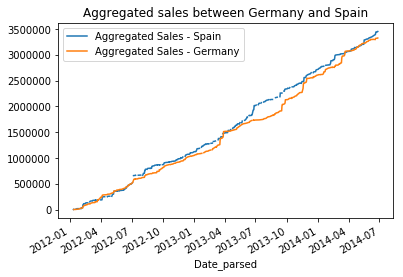

In [315]:
# Plot a graph with both aggregated sales together

Germany = german_sales_tot[['Date_parsed','Aggregated sales']]
Spain = spanish_sales_tot[['Date_parsed','Aggregated sales']]

# Spanish dates were missing, causing a problem with plotting the data. 
# Let's clean that out by merging both dataframes, empty values will be Nans
merged = pd.merge(Germany, Spain, on='Date_parsed', how='outer')
merged = merged.rename(columns={'Aggregated sales_x': 'Aggregated Sales - Germany',
               'Aggregated sales_y': 'Aggregated Sales - Spain'})

# plot the graph to show the aggregated sales for Germany and spain
merged.plot(x = 'Date_parsed', y =['Aggregated Sales - Spain','Aggregated Sales - Germany'], title='Aggregated sales between Germany and Spain')

In [257]:
# check some informatino about German and Spain stores and quantity of customers
print(len(spanish_customer_list))
print(len(german_customer_list))
print(len(spanishcustomers['City'].unique()))
print(len(germancustomers['City'].unique()))

36
38
9
10


Spain has 36 unique customers and 9 unique stores

Germany has 38 unique customers and 10 unique stores, and as we saw before, more orders

Even if that difference isn't quite significant, Germany is still performing slightly under Spain. There was a drop in Sales value between July 2013 and early 2014, then the sales values has steadily increased to come closer to the Spanish ones.

In [326]:
# SPAIN - AGGREGATED MARGIN

spanish_margin_tot = spanishcustomers.groupby(['Date_parsed']).sum().reset_index()
spanish_margin_tot = spanish_margin_tot.sort_values(by='Date_parsed', ascending=True).reset_index()

spanish_margin_tot.loc[0, 'Aggregated margin'] = spanish_margin_tot['Margin'][0]
spanish_margin_tot.head()

for i in range(1, len(spanish_margin_tot)):
     spanish_margin_tot.loc[i, 'Aggregated margin'] = spanish_margin_tot['Margin'][i] + spanish_margin_tot['Aggregated margin'][i-1]


In [327]:
# Germany - AGGREGATED MARGIN
german_margin_tot = germancustomers.groupby(['Date_parsed']).sum().reset_index()
german_margin_tot = german_margin_tot.sort_values(by='Date_parsed', ascending=True).reset_index()

german_margin_tot.loc[0, 'Aggregated margin'] = german_margin_tot['Margin'][0]
german_margin_tot.head()

for i in range(1, len(german_margin_tot)):
     german_margin_tot.loc[i, 'Aggregated margin'] = german_margin_tot['Margin'][i] + german_margin_tot['Aggregated margin'][i-1]


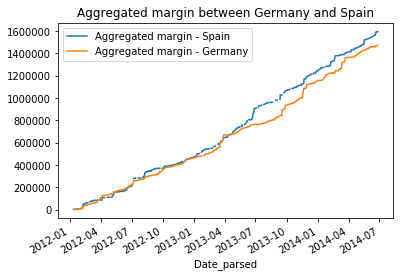

In [328]:
# Plot a graph with both aggregated sales together

Germany_margin = german_margin_tot[['Date_parsed','Aggregated margin']]
Spain_margin = spanish_margin_tot[['Date_parsed','Aggregated margin']]

# Spanish dates were missing, causing a problem with plotting the data. 
# Let's clean that out by merging both dataframes, empty values will be Nans
merged = pd.merge(Germany_margin, Spain_margin, on='Date_parsed', how='outer')
merged = merged.rename(columns={'Aggregated margin_x': 'Aggregated margin - Germany',
               'Aggregated margin_y': 'Aggregated margin - Spain'})

# plot the graph to show the aggregated sales for Germany and spain
merged.plot(x = 'Date_parsed', y =['Aggregated margin - Spain','Aggregated margin - Germany'], title='Aggregated margin between Germany and Spain')

Germany operates at a lower margin than Spain, the difference seems to widen in the last months of operation

## Conclusion

Even if Germany has more orders, a larger amount of stores and customer base, they are performing worse than Spain.

Since their profit margin is growing less than Spain, and the spread seems to be widening, se recommend looking deeper into the discounts offered to customers and products offered to increase profit margin and rentability.

We should also look at the other regions to see if we can find the same kind of patterns


### Personal conclusion
On a personal level, it's been quite a challenge to being able to create graphs with more than 2 datasets. 

For the last 2 graphs, it took me a while to understand that the errors I was encountering were due to non-homogenous datasets in terms of timedate information available: matplot lib couldn't plot as some dates were not existing in the Spanish dataset.
The solution I found was to merge the two Spanish and German datasets, so that unavailable values would populate with Nans, that Matplotlib was able to use to create the graph; hence the patchy line for the Spanish data.

I also found it quite easy to get lost into diving into a problem while there was no concrete question asked at the start, but it was fun creating problems and trying to solve them, even if it didn't quite fit the narrative all the way through in this case.